In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [68]:
# load hair dryer data
hd_path = "Problem_C_Data/hair_dryer.tsv"
hd = pd.read_table(hd_path)
hd

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,N,N,great hair!,"I just purchased this dryer, and I really like...",8/21/2002
11466,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,N,N,Disappointment with dryer,I purchased it because it was supposed to be q...,8/13/2002
11467,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,N,Y,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",7/13/2002
11468,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,N,N,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,4/20/2002


(array([1032.,    0.,  639.,    0.,    0.,  999.,    0., 2096.,    0.,
        6704.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

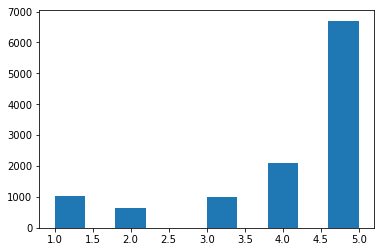

In [24]:
plt.hist(hd['star_rating'])

In [69]:
hd['verified_purchase'] = hd['verified_purchase'].apply(str)
hd.groupby(['verified_purchase']).count()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,review_headline,review_body,review_date
verified_purchase,,,,,,,,,,,,,,
N,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659
Y,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9809,9811,9811


In [70]:
hd = hd[hd.verified_purchase!='N']

In [71]:
hd = hd.drop(['marketplace','product_category','verified_purchase'],axis=1)

In [72]:
hd = hd.drop(['review_headline','review_body','total_votes'],axis=1)

In [73]:
hd = hd.drop(['product_title','vine'],axis=1)

In [74]:
num_reviews = hd.groupby("product_parent")['star_rating'].count()
products = list(num_reviews.keys())
for product,reviews in num_reviews.items():
    if reviews<30:
        products.remove(product)
print(products)

[423960, 16483457, 26711891, 47684938, 57056668, 74735317, 107341965, 108191918, 109106777, 121009604, 122140779, 127343313, 153523919, 179801564, 187812876, 194533684, 195677102, 196041133, 197856712, 199558933, 218297570, 221722169, 223051644, 235105995, 238410319, 253762851, 253917972, 258419037, 290876515, 303775294, 316756803, 328811288, 345449343, 357308868, 380013605, 391944105, 392681682, 396337866, 407404113, 415057628, 415529274, 443954263, 453645026, 475989673, 486589264, 486774008, 531479992, 531585937, 535977674, 560455235, 568981338, 569841544, 593915883, 614083399, 619941271, 635386699, 646926938, 670161917, 676407800, 685652978, 694290590, 711329162, 732252283, 734632472, 748065701, 758099411, 761176783, 772841097, 805407843, 814216548, 815035474, 833461643, 843035023, 868768702, 888313825, 897437023, 918034537, 919751065, 955015830, 959834931, 963066492, 983445543]


In [75]:
hd = hd[hd['product_parent'].isin(products)]      

In [76]:
hd.groupby("product_parent").count()

,customer_id,review_id,product_id,star_rating,helpful_votes,review_date
product_parent,,,,,,
423960,68,68,68,68,68,68
16483457,60,60,60,60,60,60
26711891,63,63,63,63,63,63
47684938,510,510,510,510,510,510
57056668,52,52,52,52,52,52
...,...,...,...,...,...,...
919751065,98,98,98,98,98,98
955015830,30,30,30,30,30,30
959834931,33,33,33,33,33,33


In [77]:
hd['product_parent'] = hd['product_parent'].apply(str)
product_sample = hd[hd['product_parent']=='694290590']
product_sample

,customer_id,review_id,product_id,product_parent,star_rating,helpful_votes,review_date
66,3856212,R27KFIYH6UN3Z9,B00005O0MZ,694290590,1,0,8/25/2015
186,46619972,R1LU6MAM378SEH,B00005O0MZ,694290590,2,1,8/15/2015
197,6214018,R29JDZDNRBCLAS,B00005O0MZ,694290590,3,0,8/14/2015
378,9129123,R1E4NGFC7ODLH2,B00005O0MZ,694290590,5,1,7/31/2015
443,32462836,R2LQMP3CL04QK3,B00005O0MZ,694290590,5,0,7/26/2015
...,...,...,...,...,...,...,...
11397,16086911,R1NDRMC9ADPUOC,B00005O0MZ,694290590,5,5,3/8/2006
11406,35647799,R17YDVO1GZ0CVZ,B00005O0MZ,694290590,5,5,2/24/2006
11446,50473837,R12APPEFY714W7,B00005O0MZ,694290590,2,5,8/15/2004
11467,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,5,4,7/13/2002


In [78]:
hd['review_date'] = pd.to_datetime(hd['review_date'])

In [160]:
product_sample['review_date'] = pd.to_datetime(product_sample['review_date'])

/Users/jiaying/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
variables = pd.DataFrame(columns=['avg_rating','number of 1 star','number of 2 stars','number of 3 stars','number of 4 stars','number of 5 stars','period'])

In [84]:
for p in hd['product_parent'][70:82]:
    product_sample = hd[hd['product_parent']==p]
    s_date = product_sample.sort_values(by='review_date')
    s_date_sub = s_date[:8]
    star = [1,2,3,4,5]
    num_star = [0]*7

    for i in range(8):
        for s in star:
            if s == s_date.iloc[i]['star_rating']:
                num_star[s] += 1
    num_star[0] = s_date_sub['star_rating'].mean()
    num_star[6] = (s_date.iloc[17]['review_date']-s_date.iloc[7]['review_date']).days
    a_series = pd.Series(num_star,index=variables.columns)
    variables = variables.append(a_series,ignore_index=True)

    for i in range(8,len(s_date.index)):
        num_star[0] = num_star[0] + (s_date.iloc[i]['star_rating']-num_star[0])/(i+1)
        s_date_sub = s_date_sub.sort_values(by='helpful_votes')
        if s_date.iloc[i]['helpful_votes']>=s_date_sub.iloc[0]['helpful_votes']:
            if i+10 < len(s_date.index):
                num_star[-1] = (s_date.iloc[i+10]['review_date']-s_date.iloc[i]['review_date']).days
            else:
                num_star[-1] = None
            for s in star:
                if s == s_date_sub.iloc[0]['star_rating']:
                     num_star[s] -= 1
                if s == s_date.iloc[i]['star_rating']:
                     num_star[s] += 1
            s_date_sub.iloc[0] = s_date.iloc[i]
            a_series = pd.Series(num_star,index=variables.columns)
            variables = variables.append(a_series,ignore_index=True)
print(variables)

      avg_rating  number of 1 star  number of 2 stars  number of 3 stars  \
0       4.250000               0.0                1.0                0.0   
1       4.333333               0.0                1.0                0.0   
2       4.400000               0.0                1.0                0.0   
3       4.272727               0.0                1.0                1.0   
4       4.250000               0.0                1.0                0.0   
...          ...               ...                ...                ...   
2085    4.500000               0.0                1.0                0.0   
2086    4.469697               0.0                1.0                1.0   
2087    4.400000               1.0                1.0                1.0   
2088    4.317647               1.0                1.0                1.0   
2089    4.281818               0.0                1.0                2.0   

      number of 4 stars  number of 5 stars  period  
0                   3.0           

In [85]:
variables.to_csv('prep_hair_dryer.csv')